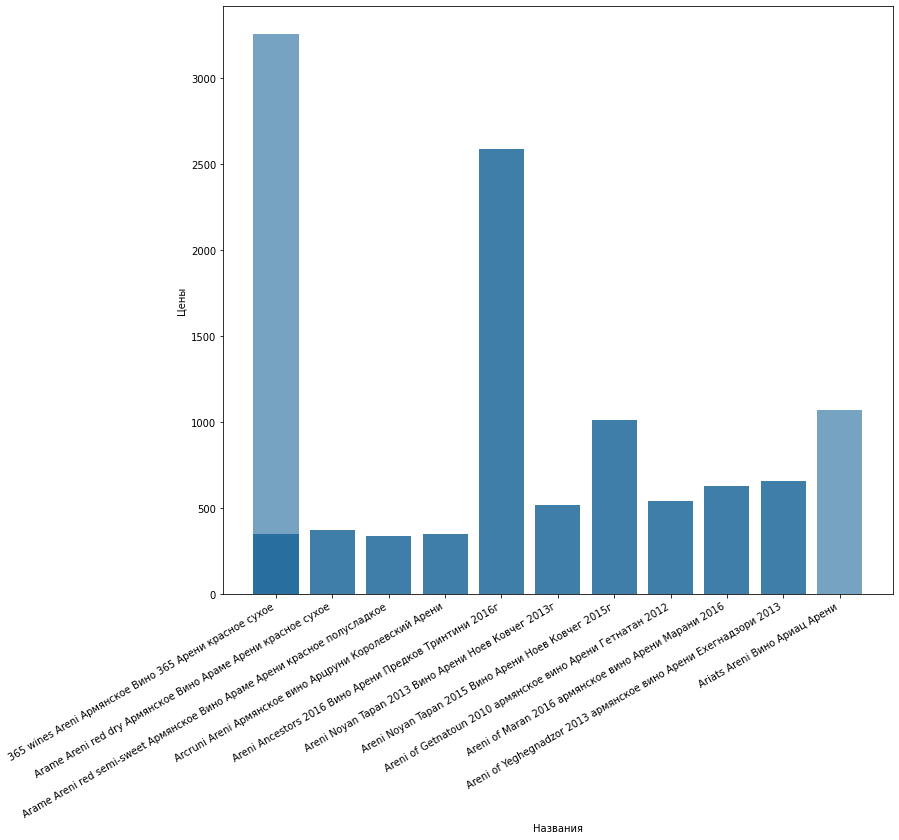

In [38]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import dateutil.parser
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import pylab as pl
from pylab import *
import datetime
import operator
import os
import re
pd.set_option("display.width", 3000)
pd.set_option("max_colwidth", 0)

client=MongoClient('localhost',27017)
db=client.shop_ararat

data_wine = list(db.final_wine.find({},{'_id':0}))
data_artsakh = list(db.final_artsakh.find({},{'_id':0}))
data_konyak = list(db.final_konyak.find({},{'_id':0}))

categories_wine = []
dates_category_link_wine = []
goods_wine = []
href_wine = []
dates_wines = []
for i in list(data_wine):
    categories_wine.append(i['category_name'])
    href_wine.append(i['link'])
    for j in list(i.values()):
        if type(j) == dict:
            goods_wine.append(j)
    for k in list(i.keys()):
        dates_category_link_wine.append(k)
counter_wine = []
dates_wines = dates_category_link_wine[2:]
for i in range(len(goods_wine)):
     counter_wine.append(len(goods_wine[i].keys()))

# final = [categories_wine,goods_wine,counter_wine,href_wine,dates_wines]
# df = pd.DataFrame.from_dict(final)
# df.index = ['Категории','Товары','Число товаров','Ссылки','Дата']
# df.columns += 1
# df.T
# print(goods_wine)
names_wines = []
cost_wines = []
for i in goods_wine:
    for a,b in i.items():
        names_wines.append(a)
        cost_wines.append(b)
# print(names_wines)
# names_wines = names_wines[:20]

# cost_wines = cost_wines[:20]
# print(goods)
sorted_x_bad = []
for i in goods_wine:
    sorted_x_bad.append(sorted(i.items(), key=operator.itemgetter(0)))

sorted_x=[]
for i in sorted_x_bad:
    for j in i:
        sorted_x.append(j)
sorted_x.sort(key=operator.itemgetter(0))

names_new = []
cost_new = []
for i in range(len(sorted_x)):
    names_new.append(sorted_x[i][0])
    cost_new.append(sorted_x[i][1])    
names_new = names_new[:21]
cost_new = cost_new[:21]


fig, ax = plt.subplots(figsize = (12,12))
ax.set_xlabel('Названия')
ax.set_ylabel('Цены')
# ax.bar(names_new,cost_new,label = 'wines')
# ax.legend(fontsize = 12,
#           ncol = 1,    #  количество столбцов
#           facecolor = 'oldlace',    #  цвет области
#           edgecolor = 'r',    #  цвет крайней линии
#           title = '',    #  заголовок
#           title_fontsize = '13'    #  размер шрифта заголовка
#          )

names_new.append('365 wines Areni Армянское Вино 365 Арени красное сухое')
cost_new.append(3255)
# def autolabel(rects):
#     for idx,rect in enumerate(bar_plot):
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2., height+6,
#                 cost_wines[idx-1],
#                 ha='center', va='bottom', rotation=0,size=10)

# bar_plot=plt.bar(names_new,cost_new,color=(0.2, 0.4, 0.6, 0.6))
# print(names_new)

plt.bar(names_new,cost_new,color=(0.1, 0.4, 0.6, 0.6))

# autolabel(bar_plot)
plt.gcf().autofmt_xdate()
# plt.savefig('gradus_final_1.png', dpi=75)
# plt.show()
# df.to_html('gradus.html')
# df.T